## Project 2 - Methods for Root Finding

## Introduction

### Project Structure

In [1]:
%ls ..

MATH3316-Project2.xcodeproj/ lib/
Makefile                     res/
bin/                         src/
doc/


Excluding the `.xcodeproj` file, which was used for integration with the Xcode IDE, debugging, and profiling purposes, each item in the project directory serves the following purpose:

- `Makefile`: GNU Make project build automation definitions.
- `bin/`: compiled binaries. Make will put binaries here by default.
- `doc/`: directory containing all documentation, including this report.
- `lib/`: reused libraries that are not part of this project specifically. Contains a rewrite of the Matrix library ([phrz/matrix](https://github.com/phrz/matrix)).
- `res/`: where calculated data is stored after program execution. Files are `.txt` files containing real numbers, space delimited to denote row items, and newline delimited to denote new rows. For this project, the `.txt` files are also organized into separate `res/part{1..2}/` directories.
- `src/`: contains the C++ implementations of the calculations described in this report.

### Using this Project

#### Prerequisites
- A Unix or Unix-like OS (e.g. macOS or Linux)
- A compiler with support for C++14 (LLVM or GNU toolchain)
- Python ≥3.5
- The latest Jupyter distribution
    - matplotlib
- LaTeX with `pdflatex`
- GNU Make ≥3.81

#### Building this project

`make all` (default) - will compile binaries, execute them to generate data files, execute Jupyter notebooks with new data files, and convert them to PDFs in `res/reports/`.

`make all_bin` - will compile binaries for part 1 and 2 of this project.

`make all_data` - will compile binaries and execute them to generate data files.

`make clean` - will delete all compiled binaries, generated data, executed notebook copies (but not the original notebooks), and report PDFs.

## Part 1 - Newton's Method

Newton's method is an iterative algorithm for approximating roots of a real-valued function.

### Background

#### Newton's Method

Newton's method is defined as

$$
x_{k+1} = x_k + \frac{f(x_k)}{f'(x_k)}\ \ ,\ \ k = 0, 1, 2, 3, \ldots
$$

with an initial guess $x_0$ which is close to the root $r$.

This algorithm is greedy, finding those root(s) that are local to the initial guess. Guesses closer to a desired root tend to yield that root.

### Computation and Data

As per the project requirements, the program evaluates the function $f(x) = x^2 (x - 3) (x + 2) = 0$ with initial guesses $x_0 = \{-3, 1, 2\}$ and error tolerances of $\epsilon = \{10^{-1}, 10^{-5}, 10^{-9}\}$, for a total of 9 tests. The output can be seen below.


In [1]:
%cat ../res/part1/newton.txt

x_0 = -3
eps = 0.1
iter 1, x = -3, |h| = 0, |f(x)| = 54
iter 2, x = -2.45455, |h| = 0.545455, |f(x)| = 14.9375
iter 3, x = -2.14186, |h| = 0.312681, |f(x)| = 3.3464
iter 4, x = -2.01957, |h| = 0.122291, |f(x)| = 0.400736
The approximate root is: -2.01957

x_0 = -3
eps = 1e-05
iter 1, x = -3, |h| = 0, |f(x)| = 54
iter 2, x = -2.45455, |h| = 0.545455, |f(x)| = 14.9375
iter 3, x = -2.14186, |h| = 0.312681, |f(x)| = 3.3464
iter 4, x = -2.01957, |h| = 0.122291, |f(x)| = 0.400736
iter 5, x = -2.00045, |h| = 0.0191283, |f(x)| = 0.00891221
iter 6, x = -2, |h| = 0.000445134, |f(x)| = 4.75706e-06
The approximate root is: -2

x_0 = -3
eps = 1e-09
iter 1, x = -3, |h| = 0, |f(x)| = 54
iter 2, x = -2.45455, |h| = 0.545455, |f(x)| = 14.9375
iter 3, x = -2.14186, |h| = 0.312681, |f(x)| = 3.3464
iter 4, x = -2.01957, |h| = 0.122291, |f(x)| = 0.400736
iter 5, x = -2.00045, |h| = 0.0191283, |f(x)| = 0.00891221
iter 6, x = -2, |h| = 0.000445134, |f(x)| = 4.75706e-06
iter 7, x = -2, |h| = 2.37853e-07, |f(x

### Analysis

The function for which we are trying to approximate roots can be seen in the graph below.

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'axes.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
matplotlib.rcParams.update({
    'font.family': 'Helvetica, Arial, sans-serif'
})

Populating the interactive namespace from numpy and matplotlib


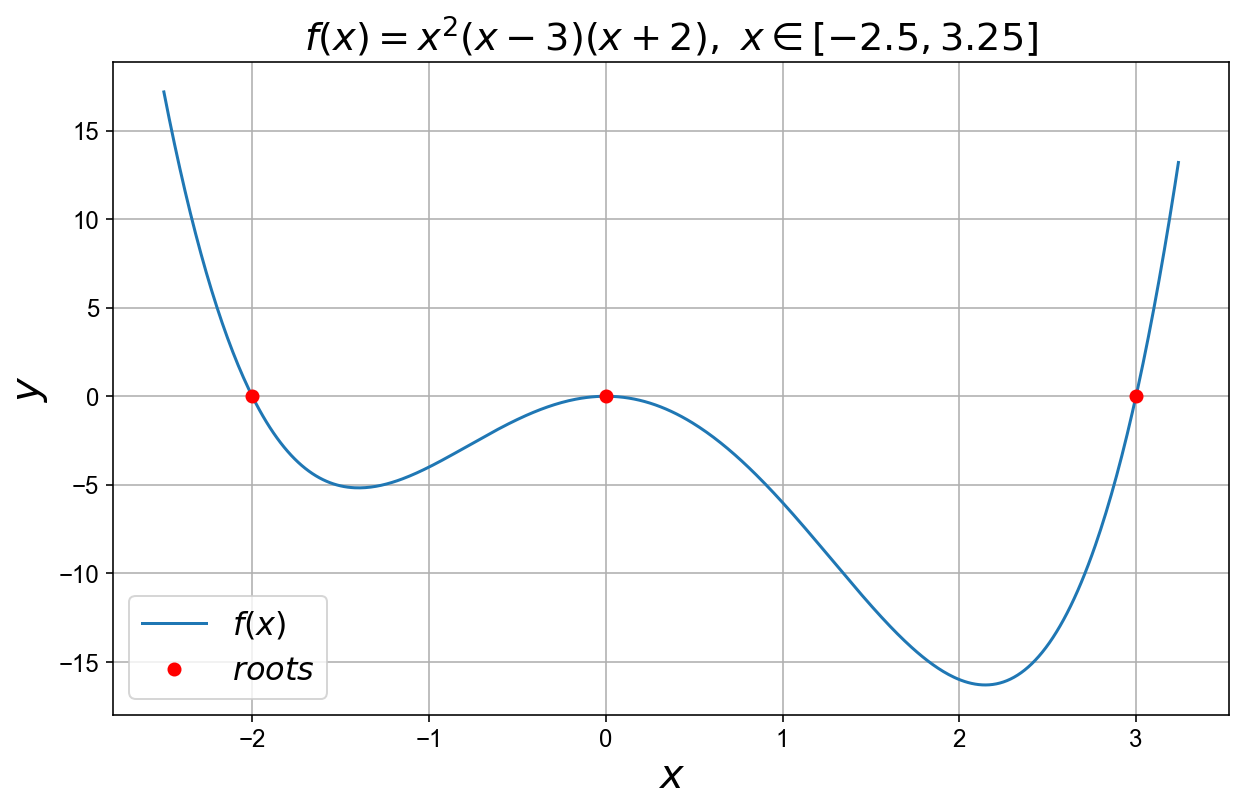

In [33]:
import numpy as np

x = np.arange(-2.5, 3.25, 0.01)
y = ((x**2) * (x - 3) * (x + 2))
root_x = [-2, 0, 3]

pylab.plot(x, y)
for i in root_x:
    pylab.plot(i, 0, 'ro')

pylab.title('$f(x) = x^2 (x - 3) (x + 2),\ x \in [-2.5,3.25]$')
pylab.xlabel('$x$')
pylab.ylabel('$y$')
pylab.grid()

pylab.legend(('$f(x)$',
              '$roots$'))

As the graph illustrates, the actual roots can be seen to be -2, 0, and 3.

Using the data output from the program, we can see that the first guess, $x = 3$, approximates the first root -2 better and better with decreasing error tolerance. This output is reproduced below:

In [36]:
%cat ../res/part1/newton.txt | awk 'FNR <= 28'

x_0 = -3
eps = 0.1
iter 1, x = -3, |h| = 0, |f(x)| = 54
iter 2, x = -2.45455, |h| = 0.545455, |f(x)| = 14.9375
iter 3, x = -2.14186, |h| = 0.312681, |f(x)| = 3.3464
iter 4, x = -2.01957, |h| = 0.122291, |f(x)| = 0.400736
The approximate root is: -2.01957

x_0 = -3
eps = 1e-05
iter 1, x = -3, |h| = 0, |f(x)| = 54
iter 2, x = -2.45455, |h| = 0.545455, |f(x)| = 14.9375
iter 3, x = -2.14186, |h| = 0.312681, |f(x)| = 3.3464
iter 4, x = -2.01957, |h| = 0.122291, |f(x)| = 0.400736
iter 5, x = -2.00045, |h| = 0.0191283, |f(x)| = 0.00891221
iter 6, x = -2, |h| = 0.000445134, |f(x)| = 4.75706e-06
The approximate root is: -2

x_0 = -3
eps = 1e-09
iter 1, x = -3, |h| = 0, |f(x)| = 54
iter 2, x = -2.45455, |h| = 0.545455, |f(x)| = 14.9375
iter 3, x = -2.14186, |h| = 0.312681, |f(x)| = 3.3464
iter 4, x = -2.01957, |h| = 0.122291, |f(x)| = 0.400736
iter 5, x = -2.00045, |h| = 0.0191283, |f(x)| = 0.00891221
iter 6, x = -2, |h| = 0.000445134, |f(x)| = 4.75706e-06
iter 7, x = -2, |h| = 2.37853e-07, |f(x


The second guess, $x = 1$, also does a pretty good job of approximating the root 0 by approaching zero as the tolerance decreases. Accordingly the output for this guess is reproduced below:

In [38]:
%cat ../res/part1/newton.txt | awk 'NR==30, NR==91'

x_0 = 1
eps = 0.1
iter 1, x = 1, |h| = 0, |f(x)| = -6
iter 2, x = 0.454545, |h| = 0.545455, |f(x)| = -1.2909
iter 3, x = 0.228022, |h| = 0.226524, |f(x)| = -0.321116
iter 4, x = 0.115144, |h| = 0.112877, |f(x)| = -0.0809002
The approximate root is: 0.115144

x_0 = 1
eps = 1e-05
iter 1, x = 1, |h| = 0, |f(x)| = -6
iter 2, x = 0.454545, |h| = 0.545455, |f(x)| = -1.2909
iter 3, x = 0.228022, |h| = 0.226524, |f(x)| = -0.321116
iter 4, x = 0.115144, |h| = 0.112877, |f(x)| = -0.0809002
iter 5, x = 0.0579873, |h| = 0.0571571, |f(x)| = -0.0203588
iter 6, x = 0.0291159, |h| = 0.0288714, |f(x)| = -0.00511036
iter 7, x = 0.014591, |h| = 0.0145249, |f(x)| = -0.00128044
iter 8, x = 0.00730406, |h| = 0.0072869, |f(x)| = -0.000320483
iter 9, x = 0.00365422, |h| = 0.00364985, |f(x)| = -8.01685e-05
iter 10, x = 0.00182766, |h| = 0.00182656, |f(x)| = -2.00482e-05
iter 11, x = 0.000913969, |h| = 0.000913692, |f(x)| = -5.0128e-06
iter 12, x = 0.000457019, |h| = 0.00045695, |f(x)| = -1.2533e-06
iter 13, x 

The third and final guess, $x = 2$, shows a different output than may be expected. The program only needs to iterate twice before it outputs an approximation of the root: $x = -2$. But this has already been done, and additionally, the guess $x_0 = 2$ is closer on the $x$-axis to the root $x = 3$. The output of the program is again displayed below.

In [43]:
%cat ../res/part1/newton.txt | awk 'NR==93, NR==109'

x_0 = 2
eps = 0.1
iter 1, x = 2, |h| = 0, |f(x)| = -16
iter 2, x = -2, |h| = 4, |f(x)| = -0
The approximate root is: -2

x_0 = 2
eps = 1e-05
iter 1, x = 2, |h| = 0, |f(x)| = -16
iter 2, x = -2, |h| = 4, |f(x)| = -0
The approximate root is: -2

x_0 = 2
eps = 1e-09
iter 1, x = 2, |h| = 0, |f(x)| = -16
iter 2, x = -2, |h| = 4, |f(x)| = -0
The approximate root is: -2


Newton's method approximates a root by finding the $x$-intercept of a tangent line. In this particular case, even though the initial guess is closer to the root $x = 3$ of the original function, the $x$-intercept of the tangent line actually ends up being the root $x = -2$, at which point the algorithm terminates. If the initial guess $x_0$ is increased slightly (~ >= +0.15)--accordingly changing the slope of the tangent line slightly--then the root $x = 3$ is approximated correctly. The modified output is displayed below.

In [15]:
%cat ../res/part1/newton-modified.txt | awk 'NR==93, NR==165'

x_0 = 2.15
eps = 0.1
iter 1, x = 2.15, |h| = 0, |f(x)| = -16.3059
iter 2, x = 191.753, |h| = 189.603, |f(x)| = 1.34471e+09
iter 3, x = 143.882, |h| = 47.8716, |f(x)| = 4.25466e+08
iter 4, x = 107.979, |h| = 35.9023, |f(x)| = 1.34615e+08
iter 5, x = 81.0544, |h| = 26.9249, |f(x)| = 4.25905e+07
iter 6, x = 60.8632, |h| = 20.1911, |f(x)| = 1.34744e+07
iter 7, x = 45.7232, |h| = 15.14, |f(x)| = 4.26254e+06
iter 8, x = 34.3728, |h| = 11.3505, |f(x)| = 1.34821e+06
iter 9, x = 25.866, |h| = 8.50677, |f(x)| = 426308
iter 10, x = 19.4942, |h| = 6.37183, |f(x)| = 134729
iter 11, x = 14.7265, |h| = 4.76766, |f(x)| = 42537.6
iter 12, x = 11.1662, |h| = 3.56034, |f(x)| = 13405.6
iter 13, x = 8.51731, |h| = 2.64886, |f(x)| = 4209.55
iter 14, x = 6.56092, |h| = 1.95639, |f(x)| = 1312.23
iter 15, x = 5.13737, |h| = 1.42354, |f(x)| = 402.624
iter 16, x = 4.13464, |h| = 1.00273, |f(x)| = 118.993
iter 17, x = 3.48022, |h| = 0.654423, |f(x)| = 31.8748
iter 18, x = 3.12805, |h| = 0.352169, |f(x)| = 6.42496

### Conclusion

As the results of the program show, Newton's method can be an effective way of approximating the roots of real-valued functions. However, this method is not fool-proof, as there can sometimes be "collisions"--that is, where an early approximations happens to "collide" with one of the actual roots, causing the algorithm to terminate prematurely.

## Part 2 - Kepler's Equation

Kepler's equation can be used to determine the position of an orbital body in an elliptical Kepler orbit.

### Background

#### Kepler's Equation
Kepler's equation is defined as

$$
\varepsilon \sin{(\omega)} - \omega = t
$$

where

* $\varepsilon = \sqrt{1 - \frac{b^2}{a^2}}$ is the object's orbital eccentricity
* $t$ is proportional to time, and
* $\omega$ is the angle of the object around its elliptical orbit

#### Determination of radial position in Keplerian orbit

One can determine the radial position of a body that is in a Keplerian orbit using the formula

$$
r(\omega) = \frac{a b}{\sqrt{(b \cos{(\omega)})^2 + (a \sin{(\omega)})^2}}
$$

#### Conversion of polar coordinates to Cartesian coordinates

Given a set of polar coordinates $(r, \omega)$, where $r$ is the radial positon and $\omega$ the angle, one can convert from polar coordinates to Cartesian coordinates with the formulae

$$
x = r \cos{(\omega)},\ y = r \sin{(\omega)}
$$

### Implementation

The main() function in `kepler.cpp` iterates over a linear space for the time constant using `PH::Vector::mapElements()`, approximating $\omega$ using Newton's method, using the previous value of $\omega$ as a first guess for the next value.

Kepler's equation must be modified to work with Newton's method. This is as simple as moving all terms to one side and setting the other side to zero. This results in

$$
\varepsilon \sin{(\omega)} - \omega - t = 0
$$

which works well with Newton's method.

### Analysis

As the plots below demonstrate, Newton's method did a wonderful job when calculating orbital positions using Kepler's equation. 

In [24]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'axes.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
matplotlib.rcParams.update({
    'font.family': 'Helvetica, Arial, sans-serif'
})

%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [25]:
names = [ 't', 'x_t', 'y_t', ]
data = {name: loadtxt('../res/part2/'+name+'.txt') for name in names}

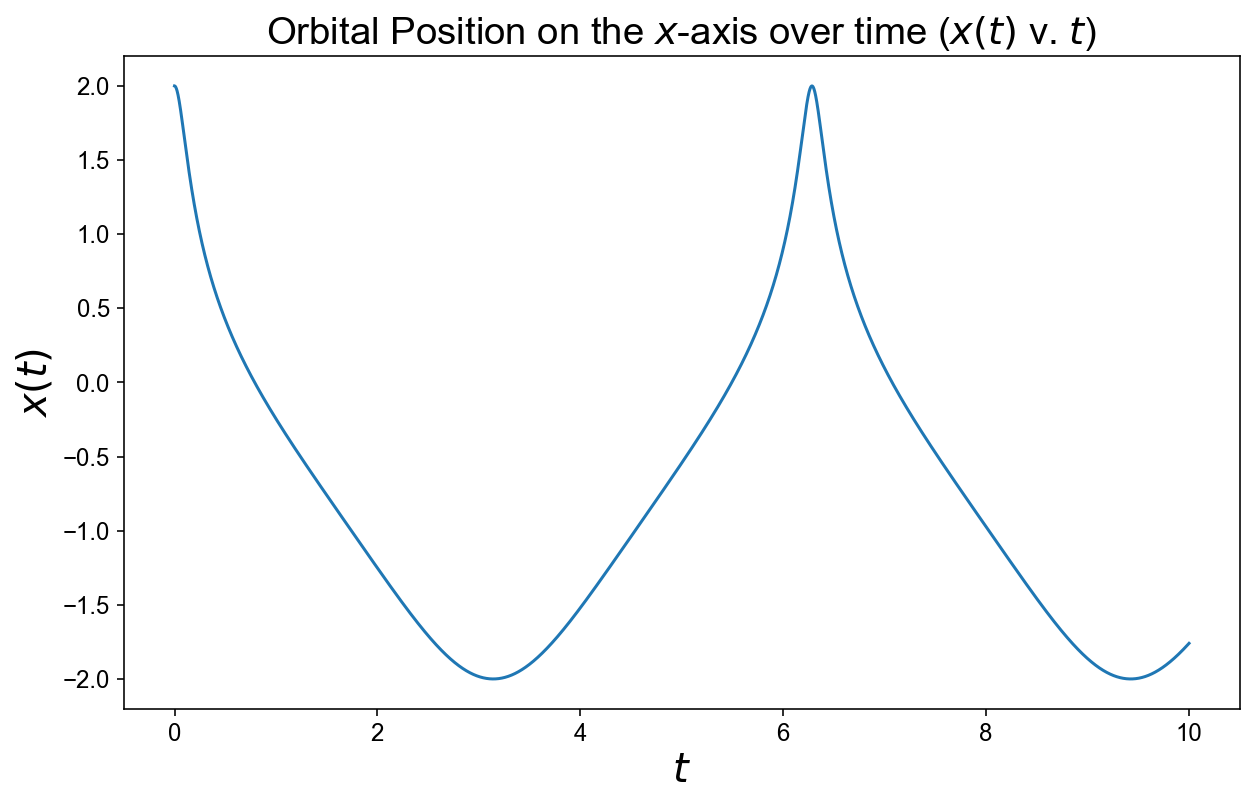

In [26]:
# Create three plots: x(t) vs t, y(t) vs t,
# and y(t) vs x(t).

pylab.plot(data['t'], data['x_t'])

pylab.title('Orbital Position on the $x$-axis over time ($x(t)$ v. $t$)')
pylab.xlabel('$t$')
pylab.ylabel('$x(t)$')

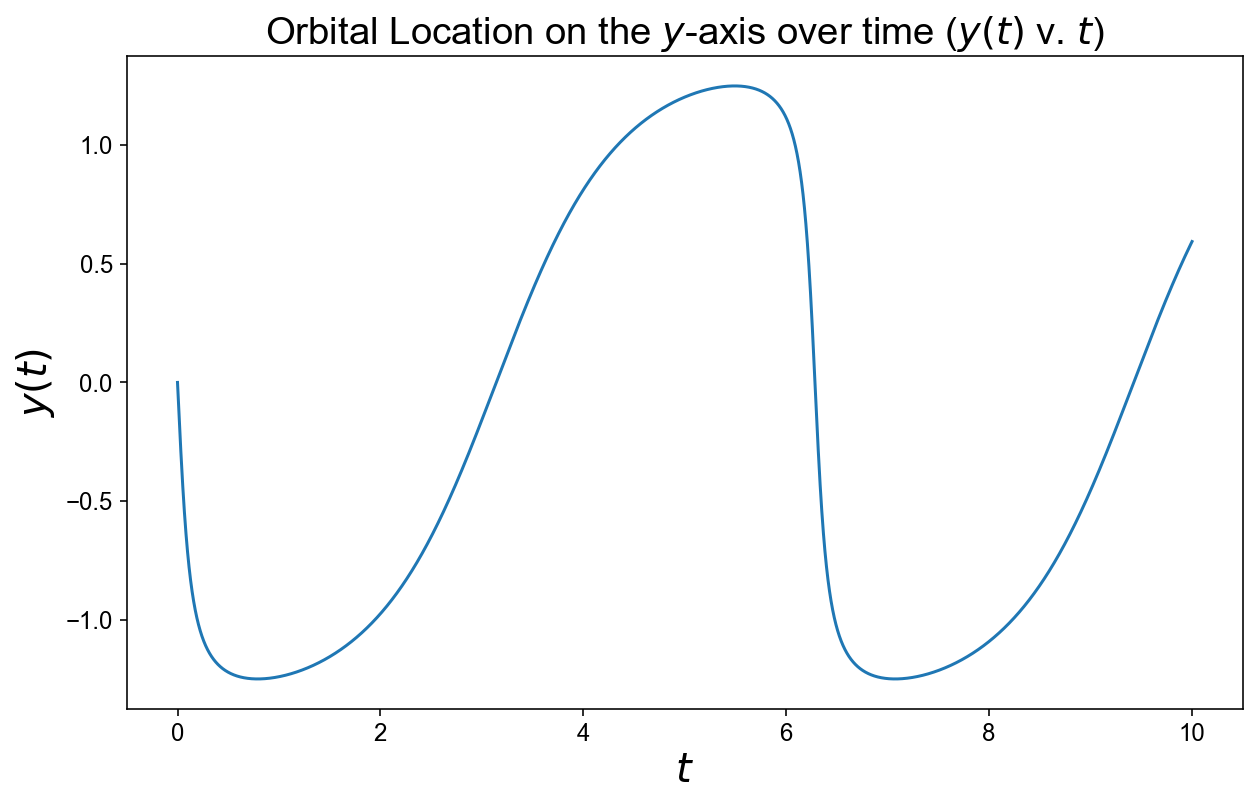

In [19]:
# Create three plots: x(t) vs t, y(t) vs t,
# and y(t) vs x(t).

pylab.plot(data['t'], data['y_t'])

pylab.title('Orbital Position on the $y$-axis over time ($y(t)$ v. $t$)')
pylab.xlabel('$t$')
pylab.ylabel('$y(t)$')

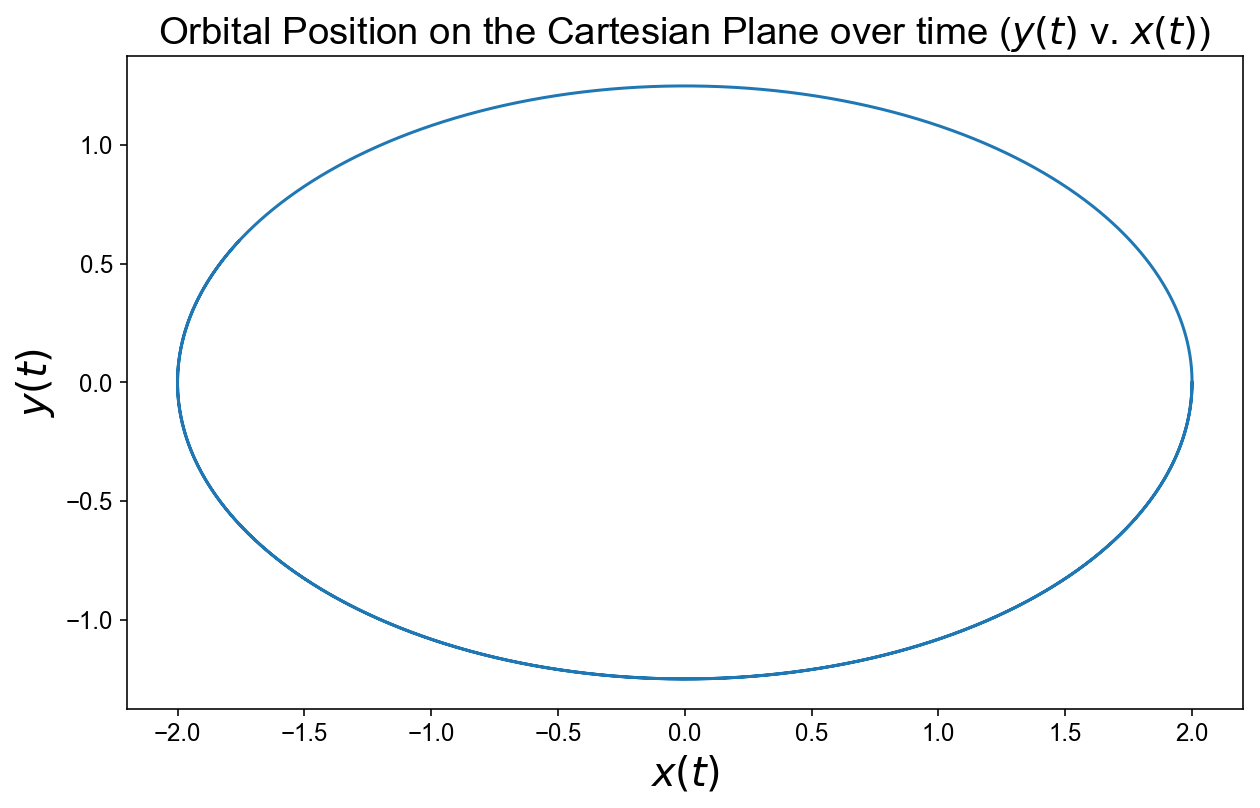

In [20]:
# Create three plots: x(t) vs t, y(t) vs t,
# and y(t) vs x(t).

pylab.plot(data['x_t'], data['y_t'])

pylab.title('Orbital Position on the Cartesian Plane over time ($y(t)$ v. $x(t)$)')
pylab.xlabel('$x(t)$')
pylab.ylabel('$y(t)$')